# Classification 2

## Exercise 1: Exploratory Data Analysis

### Overview

The objective of this course is to build models to predict customer churn for a fictitious telco company. Before we start creating models, let's begin by having a closer look at our data and doing some basic data wrangling.

Go through this notebook and modify the code accordingly based on the text and/or the comments.

### Data
Download data from here:
https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx

Description of data (for a newer version)
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### Importing Libraries

In [26]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading in the Data

In [27]:
# TASK: Read in the Excel file. Use the parameter na_values=" " to convert any empty cells to a NA value
data = pd.read_excel("Telco_customer_churn.xlsx", na_values=" ") # TASK: Use pandas to read in an Excel file. 

In [28]:
# Define columns to keep and filter the original dataset
cols_to_keep = ['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label']
data = data[cols_to_keep]

In [29]:
# TASK: Rename the multi-worded columns to remove the space 
# HINT: You can either manually remove the spaces in the column name list or use a loop to remove the space
data.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'ChurnLabel']

### Basic Information

In [30]:
# TASK: Display the number of rows and columns for the dataset
print("Rows & Columns: {}".format(data.shape))

Rows & Columns: (7043, 21)


In [31]:
# TASK: Display the datatypes for the columns in the dataframe i.e. use the dtypes variable
# How many columns are numerical and how many are non-numerical
data.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
ChurnLabel           object
dtype: object

In [32]:
# TASK: use count() on the dataframe to count the number of entries for each of the column. Are there any columns with missing values?
data.count()

CustomerID          7043
Gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
TenureMonths        7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
ChurnLabel          7043
dtype: int64

In [33]:
# TASK: Use nunique() on the dataframe to count the number of unique values for each of the columns
print(data.nunique())

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
ChurnLabel             2
dtype: int64


In [34]:
# TASK: Display first few values of the dataframe
# Based on this and the previous display, how would you describe the columns with a small number (less than 10) of unique values?
print(data.head())

   CustomerID  Gender SeniorCitizen Partner Dependents  TenureMonths  \
0  3668-QPYBK    Male            No      No         No             2   
1  9237-HQITU  Female            No      No        Yes             2   
2  9305-CDSKC  Female            No      No        Yes             8   
3  7892-POOKP  Female            No     Yes        Yes            28   
4  0280-XJGEX    Male            No      No        Yes            49   

  PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0          Yes            No             DSL            Yes  ...   
1          Yes            No     Fiber optic             No  ...   
2          Yes           Yes     Fiber optic             No  ...   
3          Yes           Yes     Fiber optic             No  ...   
4          Yes           Yes     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1 

In [35]:
# TASK: Let's analyze the values for the categorical features (columns with less than 10 unique values)
for id, row in data.nunique().iteritems():
    if(row < 10):
        print(f"{id} : {np.unique(data[id].values)}")

Gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'No phone service' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'No internet service' 'Yes']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtection : ['No' 'No internet service' 'Yes']
TechSupport : ['No' 'No internet service' 'Yes']
StreamingTV : ['No' 'No internet service' 'Yes']
StreamingMovies : ['No' 'No internet service' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['No' 'Yes']
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
ChurnLabel : ['No' 'Yes']


In [36]:
# For columns with 3 or 4 unique values, display them to see if they make sense
for col in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', "PaymentMethod"]:
    print("{} : {}".format(col, np.unique(data[col].values)))

MultipleLines : ['No' 'No phone service' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'No internet service' 'Yes']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtection : ['No' 'No internet service' 'Yes']
TechSupport : ['No' 'No internet service' 'Yes']
StreamingTV : ['No' 'No internet service' 'Yes']
StreamingMovies : ['No' 'No internet service' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


**Observations**

- The value 'No phone service' found in MultipleLines is already captured by the PhoneService feature ('No' value)
- The value 'No internet service' found in the several features is already captured by InternetService feature ('No' value)
- Values that are longer or more complex may need to be simplified.

Conclusion: These values can be considered duplicated information as they are found in the PhoneService and InternetService features. There are several options to consider here:

- Retain all features and values as is
- Convert the 'No Internet Service'/'No phone service' to 'No' in the features as PhoneService and InternetService features has already captured this information
- Remove the PhoneService feature as MultipleLines feature has this information. To remove the InternetService feature, we would have to 'fold in' the values in the other features e.g. the values for OnlineSecurity could be changed to ['DSL_No','DSL_Yes','FiberOptic_No','FiberOptic_Yes','No internet service']

For this course, we will be using the second option (without justification). You are encouraged to test the others options during modelling to see if there are any impact.

### Data Wrangling

Based on the discoveries made above, we will be modifying our data before continuing the exploration.

In [37]:
# Replace 'No phone service'
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':'No'})

In [38]:
# TASK: Replace 'No internet service'
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    data[col] = data[col].replace({'No internet service':'No'})

In [39]:
# Simplify the values made up of phrases
data['PaymentMethod'] = data['PaymentMethod'].replace({
    'Bank transfer (automatic)':'transfer',
    'Credit card (automatic)':'creditcard',
    'Electronic check':'echeck',
    'Mailed check':'mcheck'
})

data['InternetService'] = data['InternetService'].replace({
    'Fiber optic':'FiberOptic'
})

data['Contract'] = data['Contract'].replace({
    'Month-to-month':'M2M',
    'One year':'OneYear',
    'Two year':'TwoYear'
})

In [40]:
# Remove the rows with empty TotalCharges value
data = data[data["TotalCharges"].notnull()]

In [41]:
# After data wrangling, repeat prints
print("Rows & Columns: {}".format(data.shape))
print("################################################")
# Number of unique values for each of the columns
print(data.nunique())
print("################################################")
# Check the data types
print(data.dtypes)
print("################################################")
# Display first few values
print(data.head())

Rows & Columns: (7032, 21)
################################################
CustomerID          7032
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
ChurnLabel             2
dtype: int64
################################################
CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
T

In [42]:
# Randomly display 1 row from the dataframe
print(data.sample(n=1).iloc[0])

CustomerID          0807-ZABDG
Gender                  Female
SeniorCitizen               No
Partner                     No
Dependents                 Yes
TenureMonths                 3
PhoneService               Yes
MultipleLines               No
InternetService            DSL
OnlineSecurity             Yes
OnlineBackup                No
DeviceProtection            No
TechSupport                Yes
StreamingTV                 No
StreamingMovies             No
Contract                   M2M
PaperlessBilling           Yes
PaymentMethod           mcheck
MonthlyCharges            55.1
TotalCharges            154.65
ChurnLabel                 Yes
Name: 1692, dtype: object


In [43]:
# TASK: Save the data as a CSV fiile
data.to_csv("telco_churn.csv", index=False)

### Additional Exploration

**TASK:** This is the open-ended section of the exercise. Use any exploration techniques that you know to further explore and understand your data. We expect a number of visualizations that can show the relationships between features as well as between features and the outcome variable 'ChurnLabel'. Some of the questions in the quiz may require you to perform additional analyses.

The solution shown here are just examples of what could be done.

In [44]:
data.shape

(7032, 21)

In [45]:
data.describe()

,TenureMonths,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


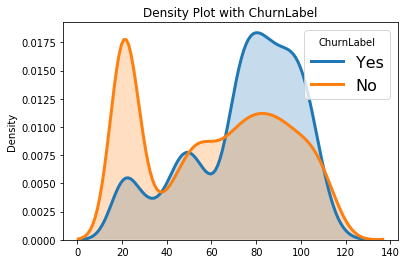

In [46]:
# Look at Churn vs MonthCharges
plt.clf()
for label in ['Yes','No']:
    subset = data[data.ChurnLabel==label]
    
    # Draw the density plot
    sns.distplot(subset['MonthlyCharges'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'ChurnLabel')
plt.title('Density Plot with ChurnLabel')
plt.xlabel('') # Monthly Charges
plt.ylabel('Density')
plt.show()

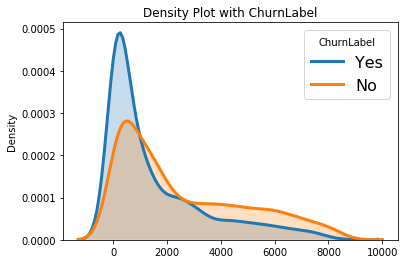

In [47]:
# Look at Churn vs MonthCharges
for label in ['Yes','No']:
    subset = data[data.ChurnLabel==label]
    
    # Draw the density plot
    sns.distplot(subset['TotalCharges'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'ChurnLabel')
plt.title('Density Plot with ChurnLabel')
plt.xlabel('') # Total Charges
plt.ylabel('Density')
plt.show()

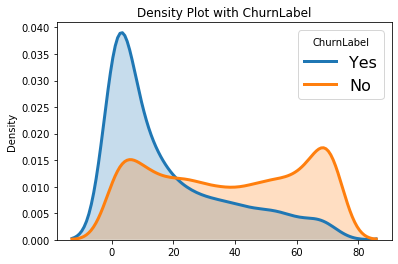

In [48]:
# Look at Churn vs MonthCharges
for label in ['Yes','No']:
    subset = data[data.ChurnLabel==label]
    
    # Draw the density plot
    sns.distplot(subset['TenureMonths'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'ChurnLabel')
plt.title('Density Plot with ChurnLabel')
plt.xlabel('') # Tenure
plt.ylabel('Density')
plt.savefig("density_plot.png")
plt.show()


In [49]:
# Additional Exploration